In [2]:
# Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [3]:
# data gathering

os.chdir('C:/Users/E530/Desktop/pjatk/metody uczenia maszynowego/dane')
os.listdir('C:/Users/E530/Desktop/pjatk/metody uczenia maszynowego/dane')

train = pd.read_csv('train.csv', delimiter =',')
test = pd.read_csv('test.csv', delimiter =',')
gender = pd.read_csv('gender_submission.csv', delimiter =',')

In [4]:
def useful_columns(file, passenger):
    list_col = list(file.columns)
    for i in list_col:
        if file.loc[file['PassengerId']==passenger][i].iloc[0] != file.loc[file['PassengerId']==passenger][i].iloc[0]:
            list_col.remove(i)
    list_col.remove('PassengerId')        
    return list_col        

In [5]:
# data chceck (train)
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
# data chceck (test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
# hypothesis check (woman survived)
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [9]:
# hypothesis check (man survived)
man = train.loc[train.Sex == 'male']["Survived"]
rate_man = sum(man)/len(man)

print("% of man who survived:", rate_man)

% of man who survived: 0.18890814558058924


In [10]:
# data examination

list_col_discret = ['Pclass','Sex', 'SibSp','Parch']
for col in list_col_discret:
    print(train[[col,'Survived','PassengerId']].groupby(by=[col,'Survived']).count())

                 PassengerId
Pclass Survived             
1      0                  80
       1                 136
2      0                  97
       1                  87
3      0                 372
       1                 119
                 PassengerId
Sex    Survived             
female 0                  81
       1                 233
male   0                 468
       1                 109
                PassengerId
SibSp Survived             
0     0                 398
      1                 210
1     0                  97
      1                 112
2     0                  15
      1                  13
3     0                  12
      1                   4
4     0                  15
      1                   3
5     0                   5
8     0                   7
                PassengerId
Parch Survived             
0     0                 445
      1                 233
1     0                  53
      1                  65
2     0                  40
      

C:\Users\E530\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


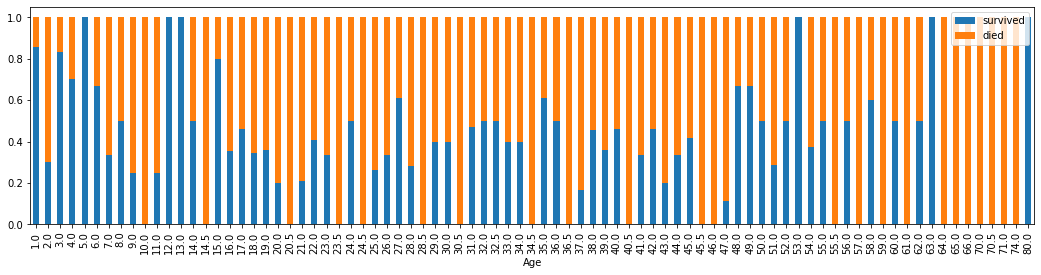

In [11]:
# by Age
for i in range(len(train)):
    if train['Age'][i]<1:train['Age'][i]=1

age_sur = train.loc[train['Survived']==1][['Age','PassengerId']].groupby(by=['Age']).count().rename(columns = {"PassengerId":"survived"})
age_died = train.loc[train['Survived']==0][['Age','PassengerId']].groupby(by=['Age']).count().rename(columns = {"PassengerId":"died"})

age = pd.concat([age_sur, age_died], axis = 1).fillna(0).reset_index()

for i in range(len(age)):
    sum_1 = age["survived"][i] + age["died"][i]
    age["survived"][i]=age["survived"][i]/sum_1
    age["died"][i]=age["died"][i]/sum_1

age.plot(x="Age", y= ["survived","died"],kind='bar', stacked=True,figsize=(18, 4))

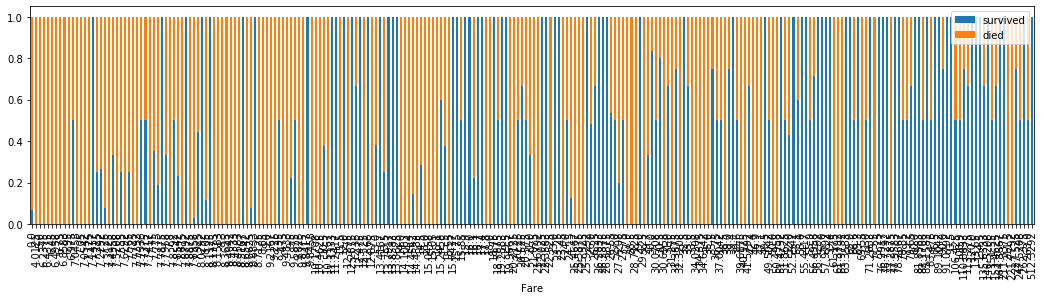

In [12]:
# by fare
fare_sur = train.loc[train['Survived']==1][['Fare','PassengerId']].groupby(by=['Fare']).count().rename(columns = {"PassengerId":"survived"})
fare_died = train.loc[train['Survived']==0][['Fare','PassengerId']].groupby(by=['Fare']).count().rename(columns = {"PassengerId":"died"})

fare = pd.concat([fare_sur, fare_died], axis = 1).fillna(0).reset_index()

for i in range(len(fare)):
    sum_2 = fare["survived"][i] + fare["died"][i]
    fare["survived"][i]=fare["survived"][i]/sum_2
    fare["died"][i]=fare["died"][i]/sum_2

fare.plot(x="Fare", y= ["survived","died"],kind='bar', stacked=True,figsize=(18, 4))

In [13]:
len(train)

891

In [14]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier #random forest

In [15]:
train =train.replace(['male','female'],[0,1])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [17]:
train_clean = train.loc[:,['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
train_clean.dropna(inplace=True)
train_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,0,22.0,1,0,7.2500
1,2,1,1,1,38.0,1,0,71.2833
2,3,1,3,1,26.0,0,0,7.9250
3,4,1,1,1,35.0,1,0,53.1000
4,5,0,3,0,35.0,0,0,8.0500


In [62]:
# Creating an instance of our decision tree
tree = DecisionTreeClassifier(
    max_depth = 5,
    random_state = 0,
    #min_samples_leaf=30,
    criterion = "entropy",
    min_samples_split = 10,
    min_weight_fraction_leaf=0.00)
# Training, aka fitting our model to the data
tree.fit(train_clean.loc[:, ['Sex','Age','Pclass','Parch','SibSp','Fare']], train_clean.Survived)
# Predicting to see how well our tree trained itself
predictions_tree = tree.predict(train_clean.loc[:, ['Sex','Age','Pclass','Parch','SibSp','Fare']]) 
# Remember that in order to get proper performance estimates you need to use cross-validation or train-test split,
#   please check: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [63]:
# Reading the confusion matrix (https://en.wikipedia.org/wiki/Confusion_matrix)
confusion_matrix(train_clean.Survived, predictions_tree)

array([[387,  37],
       [ 70, 220]], dtype=int64)

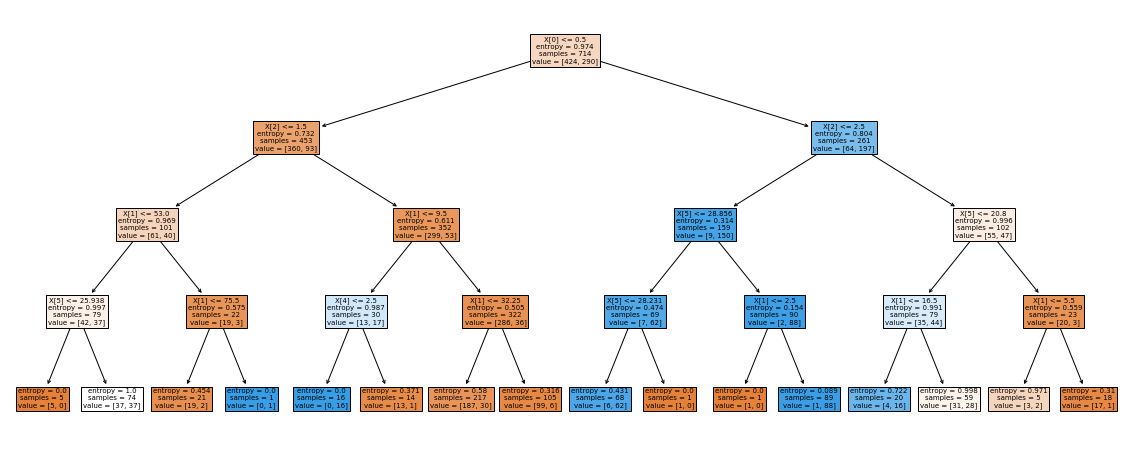

In [54]:
# Creating a plot of our model
plt.subplots(figsize=(20, 8))
plot_tree(tree, filled=True)
plt.show()

In [227]:
# Random forest
train_data = pd.read_csv('train.csv', delimiter =',')
test_data = pd.read_csv('test.csv', delimiter =',')
 

from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

#only not NaN columns
features = ["Pclass", "Sex", "SibSp", "Parch"]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output_forest = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output_forest.to_csv('submission_forest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [413]:
# DECISION TREE - VARIABLE FEATURES
train_clean_final = train.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
test_final = (test.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare']]).replace(['male','female'],[0,1])
empty = []

for i in range(len(test_final)):        
    list_col = list(test_final.columns)
    for j in list_col:
        if test_final.loc[i:i,j].iloc[0] != test_final.loc[i:i,j].iloc[0]: list_col.remove(j) 
    
    list_col_2 = list_col.copy()
    list_col_2.append('Survived')
    
    train_clean_final_2 = train.loc[:,list_col_2]
    train_clean_final_2.dropna(inplace=True)
    
    tree_var =  DecisionTreeClassifier(max_depth = 5, random_state = 0, criterion = "entropy")   
    tree_var.fit(train_clean_final_2.loc[:, list_col], train_clean_final_2.Survived)
    empty += list(tree_var.predict(test_final.loc[i:i, list_col]))
  
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': empty})
output.to_csv('submission_tree_dizzit.csv', index=False)    
    
    


In [409]:
# RANDOM FOREST - VARIABLE FEATURES
train_clean_final = train.loc[:,['Survived','Pclass','Sex','Age','SibSp','Parch','Fare']]
test_final = (test.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare']]).replace(['male','female'],[0,1])
empty = []

for i in range(len(test_final)):        
    list_col = list(test_final.columns)
    for j in list_col:
        if test_final.loc[i:i,j].iloc[0] != test_final.loc[i:i,j].iloc[0]: list_col.remove(j) 
    
    list_col_2 = list_col.copy()
    list_col_2.append('Survived')
    
    train_clean_final_2 = train.loc[:,list_col_2]
    train_clean_final_2.dropna(inplace=True)
    
    X = pd.get_dummies(train_clean_final_2[list_col])
    y = train_clean_final_2["Survived"]
    X_test = pd.get_dummies(test_data[list_col])
    
    forest_var = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)
    forest_var.fit(X,y)
    empty += list(forest_var.predict(test_final.loc[i:i, list_col]))
  
output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': empty})
output.to_csv('submission_tree_dizzit2.csv', index=False)    